# Assignment 1 - Oğulcan ÖZDEMİR 2015700093

# Question 1 (Uniform Samples from a circular region)

To draw uniform samples from $R$ and $\Theta$, we need to obtain $r$ and $\theta$ which are the polar coordinates where 
$$R \sim p(r) = \begin{cases} 2r, & 0\le r\le 1 \\ 0, & otherwise \end{cases}$$ and 
$$ \Theta \sim \textit{U}(\theta;0,2\pi) $$

We use inversion method to draw samples from $p(r)$. We need to integrate over p(r) to find cumulative distribution function $F^{-1}(r)$;
$$ F(r) = r^2 $$
$$ u = r^2 $$
$$ F^{-1}(r) = \sqrt{r} $$ 

(-1.0, 1.0, -1.0, 1.0)

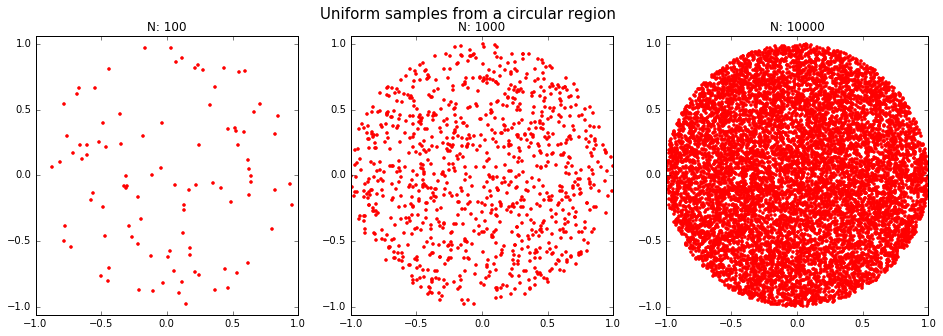

In [200]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

def sample_from_circle(nSamples):
    theta = np.random.uniform(0, 2*np.pi, nSamples)
    r = np.sqrt(np.random.rand(nSamples)) # inversion part
    # return rotated x and y polar coordinates
    return (r*np.cos(theta)),(r*np.sin(theta))

# number of samples
N = 10000

f, subplt = plt.subplots(1,3, figsize=(16,5))
plt.suptitle("Uniform samples from a circular region", fontsize=15)

x, y = sample_from_circle(int(N/100))
subplt[0].set_title("N: %d" % int(N/100))
subplt[0].plot(x, y, 'r.')
subplt[0].axis('equal')

x, y = sample_from_circle(int(N/10))
subplt[1].set_title("N: %d" % int(N/10))
subplt[1].plot(x, y, 'r.')
subplt[1].axis('equal')

x, y = sample_from_circle(int(N))
subplt[2].set_title("N: %d" % int(N))
subplt[2].plot(x, y, 'r.')
subplt[2].axis('equal')

# Question 2

To use rejection sampling to draw samples from the close ball unit, first we need to find their p-norm's then accept samples if their p-norm is lower than $1$ for the 2-norm ball in 2-dimensional space.
$$ {\lVert x,y \rVert}_{p} = (|x|^{p} + |y|^{p})^{\frac{1}{p}} $$
Then, we use the same samples which were generated in the Question 1 to draw samples using rejection sampling with $p=1.5$ and $p=0.5$.

(-1.0, 1.0, -1.0, 1.0)

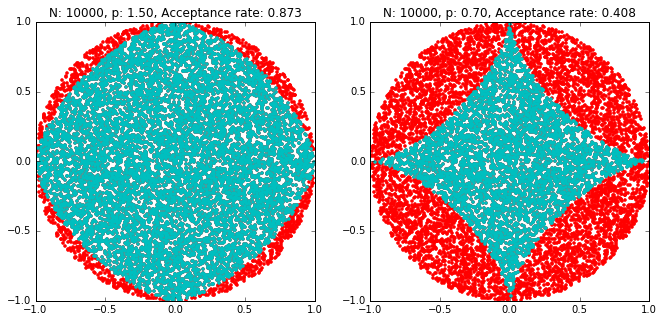

In [201]:
def p_norm(x, y, p):
    return np.power(np.power(np.absolute(x), p) + np.power(np.absolute(y), p), 1/p)

def rejection_sampling(x, y, p):
    xn = []; yn = []
    for i in range(N):
        if p_norm(x[i], y[i], p) <= 1:
            xn.append(x[i])
            yn.append(y[i])
    return xn, yn
    
p = [1.5, 0.7]

f, subplt = plt.subplots(1, 2, figsize=(11,5))

xn, yn = rejection_sampling(x, y, p[0])
subplt[0].set_title("N: %d, p: %.2f, Acceptance rate: %.3f" % (N, p[0], len(xn)/len(x)))
subplt[0].plot(x, y, 'r.')
subplt[0].plot(xn, yn, 'c.')
subplt[0].axis('equal')

xn, yn = rejection_sampling(x, y, p[1])
subplt[1].set_title("N: %d, p: %.2f, Acceptance rate: %.3f" % (N, p[1], len(xn)/len(x)))
subplt[1].plot(x, y, 'r.')
subplt[1].plot(xn, yn, 'c.')
subplt[1].axis('equal')

## Rejection Sampling with better proposal 
As can be seen in $p=0.7$ case, our sampler obtained lower acceptance rate than $p=1.5$ case. To improve our sample, we need to find better proposal and accept samples which are inside the new proposal.

To get higher acceptance rate, we use unit square rotated by $\pi/4$ degrees around the origin as our new proposal for the $p=0.7$ case.

(-1.0, 1.0, -1.0, 1.0)

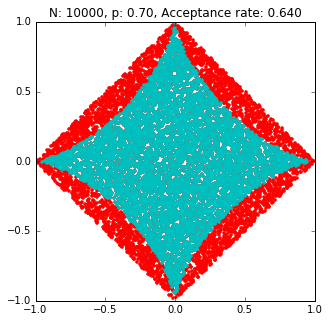

In [202]:
def sample_efficiently(nSamples):
    # sample points from [-sqrt(2), +sqrt(2)] square
    xo = np.sqrt(2) * (np.random.rand(nSamples) - (1/2))
    yo = np.sqrt(2) * (np.random.rand(nSamples) - (1/2))
    
    # rotate points by pi/4 degrees
    xr = xo*np.cos(np.pi/4) - yo*np.sin(np.pi/4)
    yr = xo*np.sin(np.pi/4) + yo*np.cos(np.pi/4)
    
    return xr, yr

p = 0.7
x, y = sample_efficiently(N)
xn, yn = rejection_sampling(x, y, p)
plt.figure(figsize=(5, 5))
plt.title("N: %d, p: %.2f, Acceptance rate: %.3f" % (N, p, len(xn)/len(x)))
plt.plot(x, y, 'r.')
plt.plot(xn, yn, 'c.')
plt.axis('equal')

## Bonus

In the bonus part of the assigment, we were supposed to implement generalized version of the sampling method that we used in Question 1 to generate uniform samples from the unit n-sphere.

To implement this function, first I generated random samples from multivariate guassian distribtuion with identity covariance matrix and zero mean vector to obtain random directions in n-dimensional space. Then, I normalized the result vector. 

(-1.0, 1.0, -1.0, 1.0)

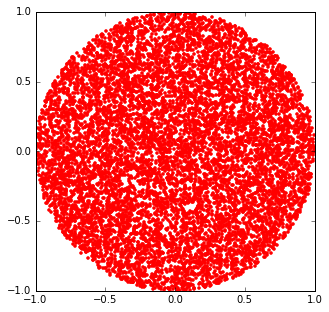

In [207]:
def normalize_vector(samples, dims):
    return samples.T / la.norm(samples, dims, axis=-1)

# generate samples from unit sphere with n dimensions
def gen_nsphere(nSamples, dims):
    covariance = np.eye(dims) # identity covariance
    mean = np.zeros(dims) # n-dimensional zero mean vector
    
    # generate directions from multivariate gaussian with identity covariance matrix 
    directions = np.random.multivariate_normal(mean, covariance, nSamples)
    # rotate random samples using normalized directions
    samples = normalize_vector(directions, dims) * (np.power(np.random.rand(nSamples), 1/dims))
    
    return samples.T

f, subplt = plt.subplots(1, 1, figsize=(5,5))

samples_2sphere = gen_nsphere(N, 2)
subplt.plot(samples_2sphere[:, 0], samples_2sphere[:, 1], 'r.')
subplt.axis('equal')

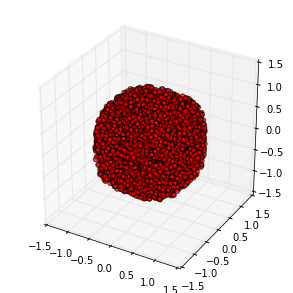

In [208]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))

# sphere
samples_nsphere = gen_nsphere(N, 3)
subplt = fig.add_subplot(1, 1, 1, projection='3d')
subplt.scatter(samples_nsphere[:,0], samples_nsphere[:,1], samples_nsphere[:,2], c='r')

For the second of the bonus part, we were suppose to implement a function which can able to use rejection sampling and accept samples which are sampled from n-cube and inside the n-sphere.

To compute the acceptance rate after rejection sampling, I calculated Euclidean Distances of samples to the origin then accept the samples if their distance are lower than $1$. As a result, we can see that acceptance rate gets lower as dimensions n get larger.

In [209]:
from scipy import special as sp

# generate samples from unit cube with n dimensions (center at origin)
def gen_ncube(nSamples, dims):
    return 2 * np.random.rand(nSamples, dims) - 1;

# compute acceptance rate of samples inside the n-sphere
ranges = np.arange(2, 12);
accepted = np.zeros(len(ranges))
for r in ranges:
    samples = gen_ncube(N, r)
    for i in range(N):
        if la.norm(samples[i, :], 2) <= 1:
            accepted[r-ranges[0]] += 1
    
for i in range(len(accepted)):
    print("Acceptance rate for n:%d = %f" % (i+ranges[0], (accepted[i]/N)))        

Acceptance rate for n:2 = 0.785500
Acceptance rate for n:3 = 0.524700
Acceptance rate for n:4 = 0.302600
Acceptance rate for n:5 = 0.163300
Acceptance rate for n:6 = 0.081800
Acceptance rate for n:7 = 0.036000
Acceptance rate for n:8 = 0.016600
Acceptance rate for n:9 = 0.007800
Acceptance rate for n:10 = 0.002100
Acceptance rate for n:11 = 0.000500


## References

1. <a href="https://en.wikipedia.org/wiki/N-sphere">N-sphere</a>, 
2. <a href="https://en.wikipedia.org/wiki/Rotation_matrix">Rotation Matrix</a>, 
3. <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)">Norm</a>